In [1]:
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set()

In [2]:
good_data = pd.read_csv('../data/good_data_20160831_364x27.csv')
print good_data.shape
print good_data.columns
print good_data.dtypes
good_data.head()

(364, 27)
Index([u'medicaid', u'hospitalized', u'rpm_hospitalized', u'rpm_falls', u'chf',
       u'copd', u'diabetes', u'hypertension', u'stroke', u'obesity',
       u'coronary_artery_disease', u'depression', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'n_conds', u'intercept'],
      dtype='object')
medicaid                   float64
hospitalized               float64
rpm_hospitalized           float64
rpm_falls                  float64
chf                          int64
copd                         int64
diabetes                     int64
hypertension                 int64
stroke                       int64
obesity                      int64
coronary_artery_disease      int64
depression                   int64
gender_f                   float64
lang_spanish               float64
caregiver                  float64
live_alon

,medicaid,hospitalized,rpm_hospitalized,rpm_falls,chf,copd,diabetes,hypertension,stroke,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,duration_in_program,feeling_trigger,n_conds,intercept
0,0.0,1.0,1.0,1.0,0,0,0,1,0,1,0,0,1.0,0.0,0.0,0.0,0.773585,147.0,68.0,55.0,269.2,97.0,27231,371,3,3,1.0
1,0.0,0.0,0.0,1.0,0,1,1,1,0,1,0,0,1.0,0.0,0.0,1.0,0.520000,135.0,74.0,69.0,195.8,96.0,30058,353,1,4,1.0
2,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0.0,0.0,0.0,0.0,0.529412,122.0,78.0,61.0,250.7,97.0,24340,357,0,2,1.0
3,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.830189,144.0,86.0,72.0,152.1,93.0,32057,371,1,1,1.0
4,1.0,0.0,1.0,0.0,0,0,1,1,0,0,0,0,0.0,0.0,0.0,1.0,0.730769,139.0,81.0,81.0,231.7,95.0,25568,364,0,2,1.0


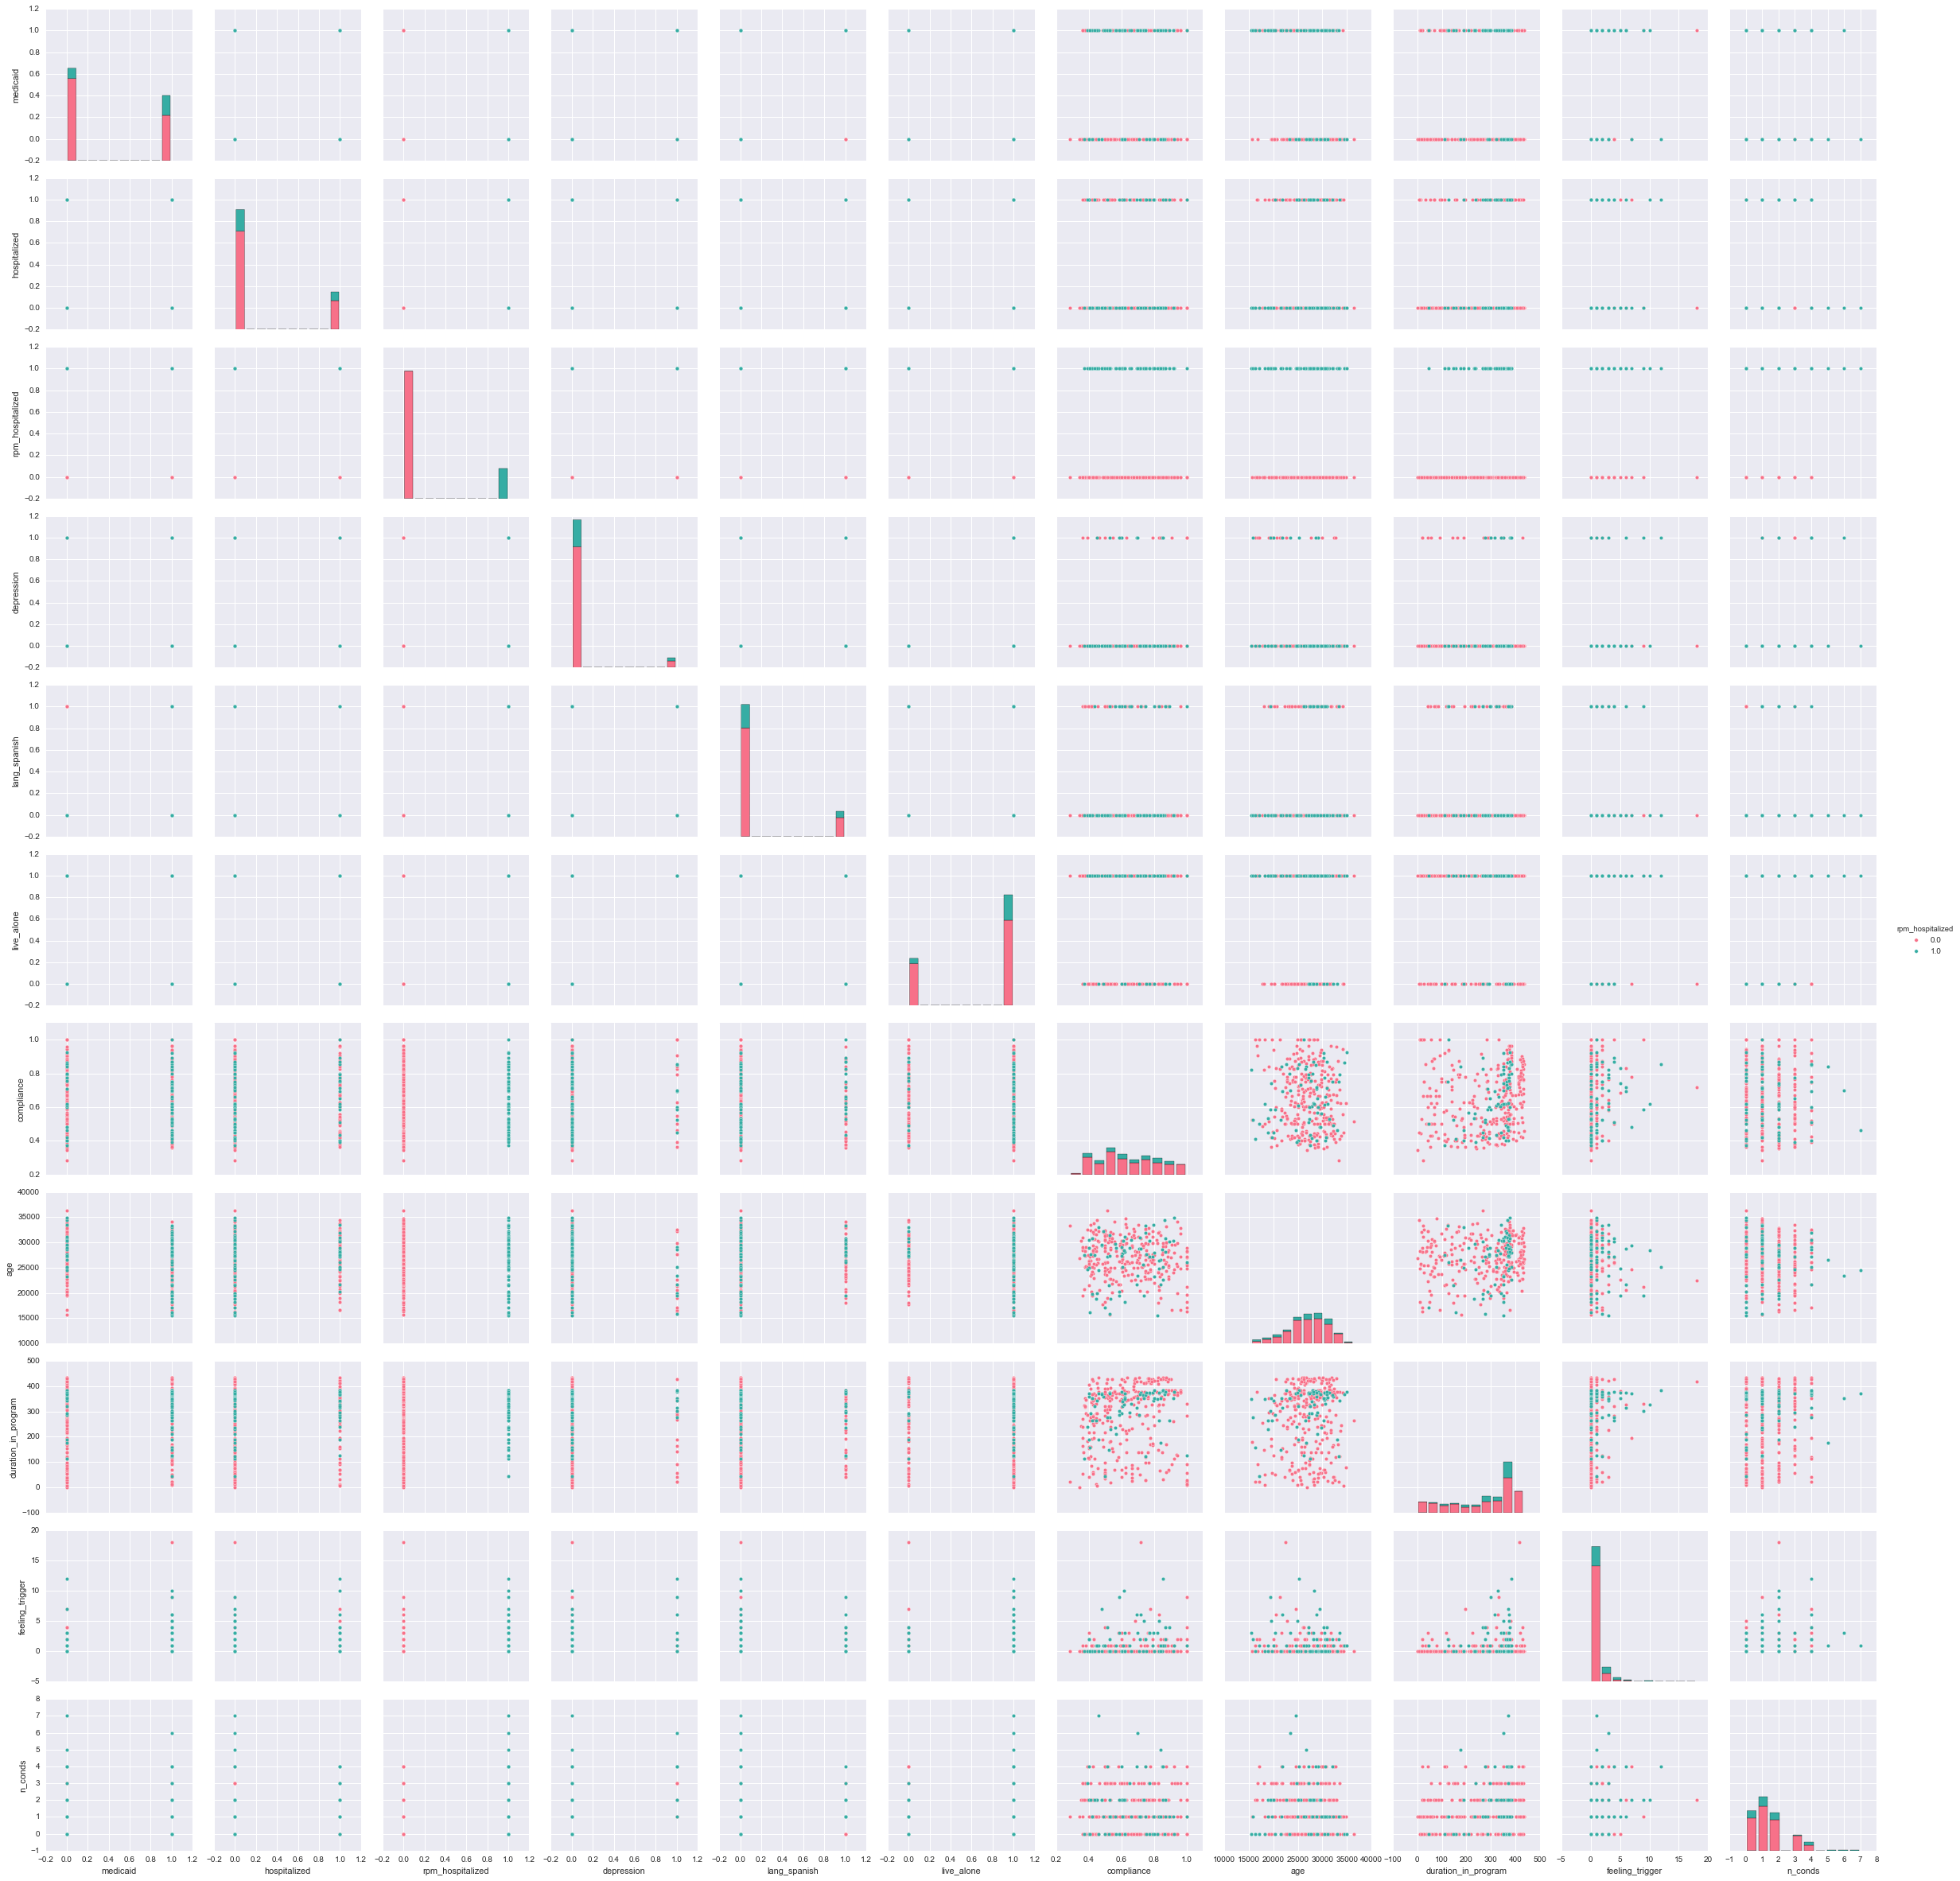

In [6]:
sns.pairplot(good_data,vars=[u'medicaid', 'hospitalized', u'rpm_hospitalized',u'depression', u'lang_spanish',
       u'live_alone', u'compliance',u'age', u'duration_in_program',
       u'feeling_trigger', u'n_conds'], hue="rpm_hospitalized",size=3, palette="husl")

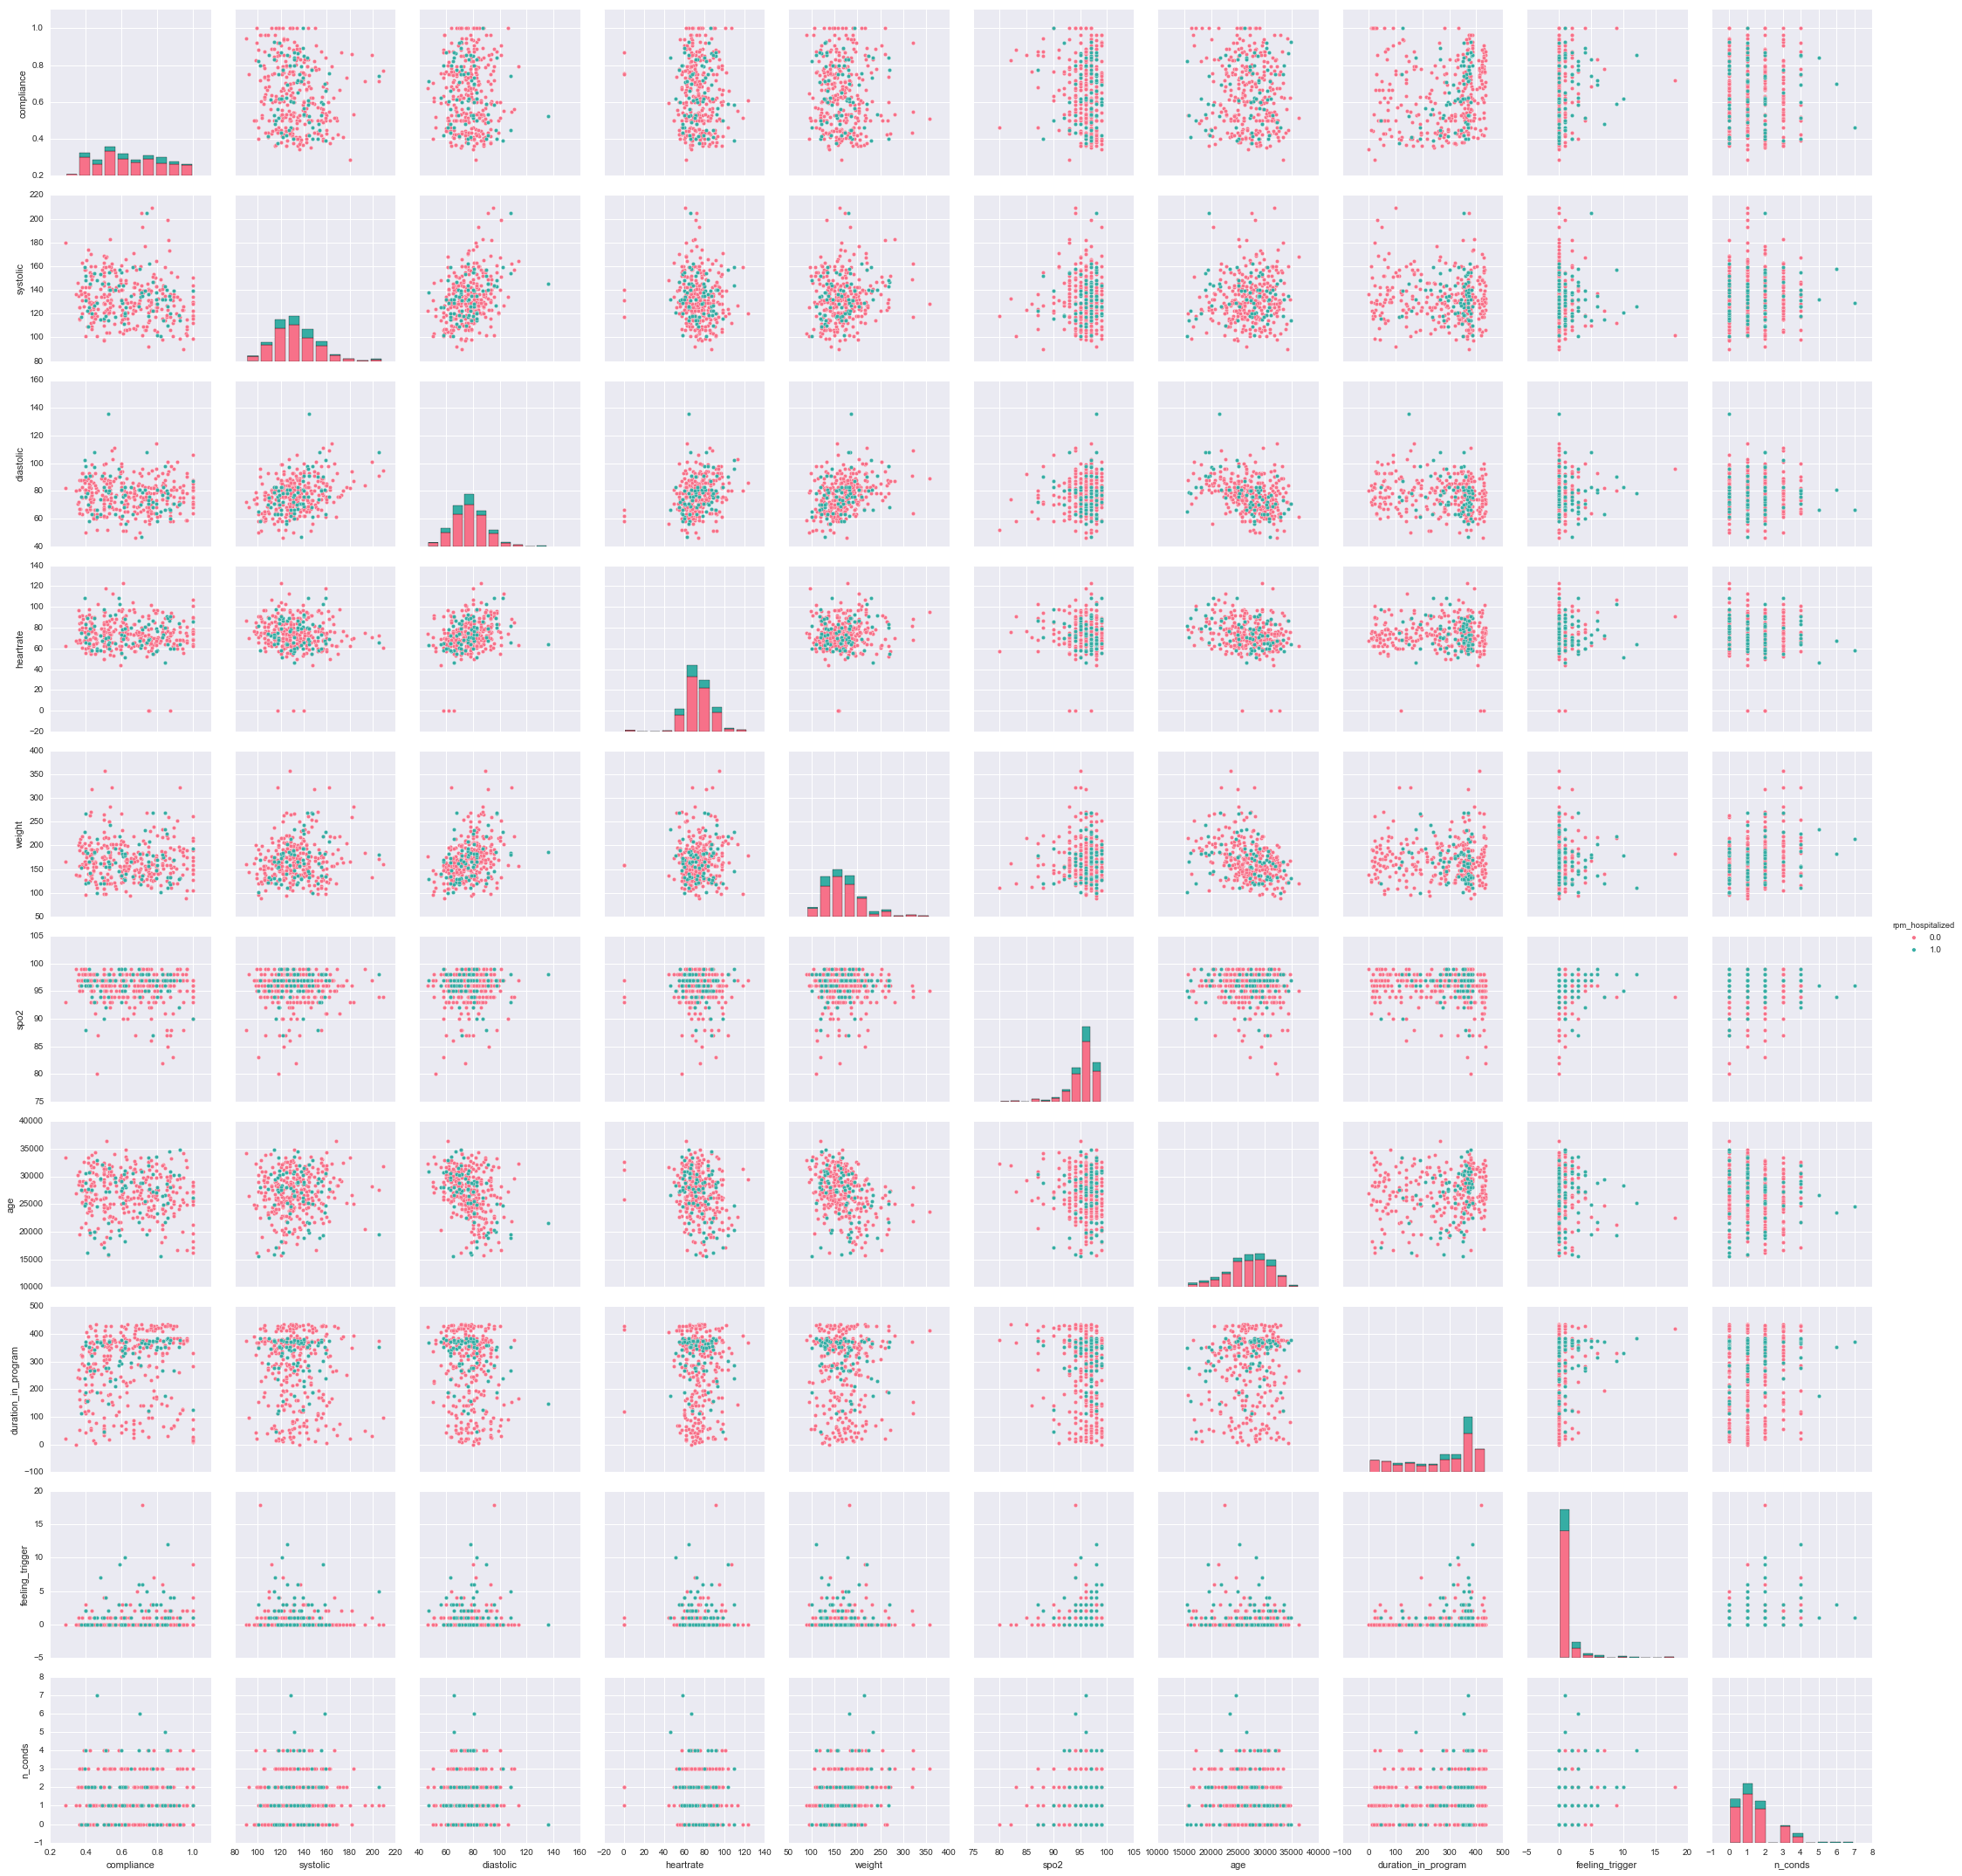

In [5]:
sns.pairplot(good_data,vars=[u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'n_conds'], hue="rpm_hospitalized",size=3, palette="husl")

In [40]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(good_data.drop(['rpm_hospitalized'],axis=1), good_data['rpm_hospitalized'],
                                                    stratify=good_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print 'Score for default classifier on training data:', score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print 'Best model from grid search:\n', grid_obj.best_estimator_
print 'Best score on grid search for parameters of model:', grid_obj.best_score_
#print grid_obj.scorer_
print 'Score of best estimator on test data:', grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=good_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

Score for default classifier on training data: 0.810810810811
Best model from grid search:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)
Best score on grid search for parameters of model: 0.834862385321
Score of best estimator on test data: 0.756756756757


,coef,exp coef
medicaid,0.718173,2.050683
hospitalized,-0.095170,0.909219
rpm_falls,1.849873,6.359013
chf,0.047417,1.048559
copd,0.000000,1.000000
diabetes,-0.143687,0.866159
hypertension,0.022813,1.023075
stroke,0.000000,1.000000
obesity,-0.326306,0.721584
coronary_artery_disease,-0.026980,0.973381


In [41]:
train_cols = [u'medicaid', u'hospitalized', u'chf', #print np.exp(result.params)
       u'copd', u'diabetes', u'hypertension', u'stroke', u'obesity',
       u'coronary_artery_disease', u'depression', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'n_conds', u'intercept']

logit = sm.Logit(good_data['rpm_hospitalized'], good_data[train_cols])

# fit the model
result = logit.fit()
print result.summary()
print np.exp(result.params)

Optimization terminated successfully.
         Current function value: 0.405744
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       rpm_hospitalized   No. Observations:                  364
Model:                          Logit   Df Residuals:                      339
Method:                           MLE   Df Model:                           24
Date:                Thu, 01 Sep 2016   Pseudo R-squ.:                  0.1712
Time:                        14:30:58   Log-Likelihood:                -147.69
converged:                       True   LL-Null:                       -178.20
                                        LLR p-value:                 4.590e-05
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
medicaid                    1.0765      0.336      3.206      0.001         0.418 

In [42]:
train_cols = [u'medicaid', u'hospitalized', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'n_conds', u'intercept']

logit = sm.Logit(good_data['rpm_hospitalized'], good_data[train_cols])

# fit the model
result = logit.fit()
print result.summary()
print np.exp(result.params)

Optimization terminated successfully.
         Current function value: 0.413124
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       rpm_hospitalized   No. Observations:                  364
Model:                          Logit   Df Residuals:                      347
Method:                           MLE   Df Model:                           16
Date:                Thu, 01 Sep 2016   Pseudo R-squ.:                  0.1561
Time:                        14:31:38   Log-Likelihood:                -150.38
converged:                       True   LL-Null:                       -178.20
                                        LLR p-value:                 2.791e-06
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
medicaid                1.0538      0.323      3.260      0.001         0.420     1.687
ho

In [6]:
chf_data = good_data[good_data['chf']==1]
print 'CHF', chf_data.shape
copd_data = good_data[good_data['copd']==1]
print 'COPD', copd_data.shape
diab_data = good_data[good_data['diabetes']==1]
print 'diabetes', diab_data.shape
hypert_data = good_data[good_data['hypertension']==1]
print 'hypertension', hypert_data.shape
obesity_data = good_data[good_data['obesity']==1]
print 'obesity', obesity_data.shape
cad_data = good_data[good_data['coronary_artery_disease']==1]
print 'cad', cad_data.shape
#falls_data = good_data[good_data['falls']==1]
#print 'falls', falls_data.shape
cond0_data = good_data[good_data['n_conds']==0]
print '0 cond', cond0_data.shape
cond1_data = good_data[good_data['n_conds']==1]
print '1 cond', cond1_data.shape
cond2_data = good_data[good_data['n_conds']==2]
print '2 conds', cond2_data.shape
cond3_data = good_data[good_data['n_conds']==3]
print '3 conds', cond3_data.shape
cond4_data = good_data[good_data['n_conds']>=4]
print '4 conds', cond4_data.shape

CHF (14, 27)
COPD (46, 27)
diabetes (87, 27)
hypertension (207, 27)
obesity (36, 27)
cad (40, 27)
0 cond (92, 27)
1 cond (125, 27)
2 conds (88, 27)
3 conds (37, 27)
4 conds (22, 27)


### Small n can yield poor models. Falls was in previous chronic conditions, but removed from the data here so it is not used.

### CHF

In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(chf_data.drop(['rpm_hospitalized'],axis=1), chf_data['rpm_hospitalized'],
                                                    stratify=chf_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=chf_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.0
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.01,
          verbose=0, warm_start=False)
0.5
<function _passthrough_scorer at 0x000000000C7012E8>
0.0


,coef,exp coef
medicaid,5.780496e-05,1.000058
hospitalized,1.061862e-06,1.000001
rpm_falls,1.605007e-05,1.000016
chf,2.401345e-06,1.000002
copd,1.714855e-05,1.000017
diabetes,-1.524937e-05,0.999985
hypertension,2.443383e-05,1.000024
stroke,1.567277e-05,1.000016
obesity,0.000000e+00,1.000000
coronary_artery_disease,3.809509e-07,1.000000


In [9]:
train_cols = [u'medicaid', u'hospitalized', #u'chf', #print np.exp(result.params)
       u'copd', u'diabetes', u'hypertension', u'stroke', u'obesity',
       u'coronary_artery_disease', u'depression', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'n_conds', u'intercept']
#print train_cols
#  # Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
import statsmodels.api as sm
logit = sm.Logit(chf_data['rpm_hospitalized'], chf_data[train_cols])

  # fit the model
result = logit.fit()
print result.summary()
print np.exp(result.params)

PerfectSeparationError: Perfect separation detected, results not available

## COPD

In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(copd_data.drop(['rpm_hospitalized'],axis=1), copd_data['rpm_hospitalized'],
                                                    stratify=copd_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=copd_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.8
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.01,
          verbose=0, warm_start=False)
0.780487804878
<function _passthrough_scorer at 0x000000000C7012E8>
0.8


,coef,exp coef
medicaid,4.879542e-07,1.000000
hospitalized,4.054378e-07,1.000000
rpm_falls,2.407244e-07,1.000000
chf,2.568384e-07,1.000000
copd,-4.316470e-08,1.000000
diabetes,-1.691184e-07,1.000000
hypertension,6.984868e-08,1.000000
stroke,0.000000e+00,1.000000
obesity,1.368525e-07,1.000000
coronary_artery_disease,-5.987678e-09,1.000000


In [13]:
train_cols = [u'medicaid', u'hospitalized', u'chf', #print np.exp(result.params)
       #u'copd',
       u'diabetes', u'hypertension', u'stroke', u'obesity',
       u'coronary_artery_disease', u'depression', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'n_conds', u'intercept']
#print train_cols
#  # Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
import statsmodels.api as sm
logit = sm.Logit(copd_data['rpm_hospitalized'], copd_data[train_cols])

  # fit the model
result = logit.fit()
print result.summary()
print np.exp(result.params)

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

### Diabetes

In [14]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diab_data.drop(['rpm_hospitalized'],axis=1), diab_data['rpm_hospitalized'],
                                                    stratify=diab_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=diab_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.555555555556
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.833333333333
<function _passthrough_scorer at 0x000000000C7012E8>
0.555555555556


,coef,exp coef
medicaid,1.343432,3.832173
hospitalized,-0.485471,0.615407
rpm_falls,1.188301,3.281502
chf,-0.069493,0.932867
copd,-0.459128,0.631835
diabetes,-0.074278,0.928414
hypertension,-0.370777,0.690198
stroke,0.182551,1.200275
obesity,0.199453,1.220735
coronary_artery_disease,0.021335,1.021564


In [15]:
train_cols = [u'medicaid', u'hospitalized', u'chf', #print np.exp(result.params)
       u'copd', #u'diabetes', 
       u'hypertension', u'stroke', u'obesity',
       u'coronary_artery_disease', u'depression', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'n_conds', u'intercept']
#print train_cols
#  # Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
import statsmodels.api as sm
logit = sm.Logit(diab_data['rpm_hospitalized'], diab_data[train_cols])

  # fit the model
result = logit.fit()
print result.summary()
print np.exp(result.params)

         Current function value: 0.259495
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:       rpm_hospitalized   No. Observations:                   87
Model:                          Logit   Df Residuals:                       63
Method:                           MLE   Df Model:                           23
Date:                Thu, 01 Sep 2016   Pseudo R-squ.:                  0.4563
Time:                        13:50:12   Log-Likelihood:                -22.576
converged:                      False   LL-Null:                       -41.522
                                        LLR p-value:                   0.02616
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
medicaid                    3.3214      1.663      1.997      0.046         0.062     6.581
hospitalized              

C:\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## Hypertension

In [16]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hypert_data.drop(['rpm_hospitalized'],axis=1), hypert_data['rpm_hospitalized'],
                                                    stratify=hypert_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=hypert_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.857142857143
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.811827956989
<function _passthrough_scorer at 0x000000000C7012E8>
0.857142857143


,coef,exp coef
medicaid,1.102442,3.011512
hospitalized,0.000000,1.000000
rpm_falls,1.396083,4.039349
chf,0.000000,1.000000
copd,0.000000,1.000000
diabetes,-0.422946,0.655114
hypertension,0.000000,1.000000
stroke,0.061701,1.063644
obesity,-0.301522,0.739691
coronary_artery_disease,-0.298903,0.741631


In [17]:
train_cols = [u'medicaid', u'hospitalized', u'chf', #print np.exp(result.params)
       u'copd', u'diabetes', #u'hypertension', 
       u'stroke', u'obesity',
       u'coronary_artery_disease', u'depression', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'n_conds', u'intercept']
#print train_cols
#  # Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
import statsmodels.api as sm
logit = sm.Logit(hypert_data['rpm_hospitalized'], hypert_data[train_cols])

  # fit the model
result = logit.fit()
print result.summary()
print np.exp(result.params)

Optimization terminated successfully.
         Current function value: 0.373861
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       rpm_hospitalized   No. Observations:                  207
Model:                          Logit   Df Residuals:                      183
Method:                           MLE   Df Model:                           23
Date:                Thu, 01 Sep 2016   Pseudo R-squ.:                  0.2773
Time:                        14:10:26   Log-Likelihood:                -77.389
converged:                       True   LL-Null:                       -107.09
                                        LLR p-value:                 4.669e-05
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
medicaid                    1.5104      0.500      3.022      0.003         0.531 

## Obesity

In [18]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(obesity_data.drop(['rpm_hospitalized'],axis=1), obesity_data['rpm_hospitalized'],
                                                    stratify=obesity_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=obesity_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.75
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.01,
          verbose=0, warm_start=False)
0.8125
<function _passthrough_scorer at 0x000000000C7012E8>
0.75


,coef,exp coef
medicaid,-3.706390e-08,1.000000
hospitalized,2.409542e-07,1.000000
rpm_falls,2.069830e-07,1.000000
chf,0.000000e+00,1.000000
copd,2.927096e-08,1.000000
diabetes,3.317824e-07,1.000000
hypertension,1.197986e-07,1.000000
stroke,3.840980e-07,1.000000
obesity,-8.627089e-08,1.000000
coronary_artery_disease,2.003036e-07,1.000000


In [19]:
train_cols = [u'medicaid', u'hospitalized', u'chf', #print np.exp(result.params)
       u'copd', u'diabetes', u'hypertension', u'stroke', #u'obesity',
       u'coronary_artery_disease', u'depression', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'n_conds', u'intercept']
#print train_cols
#  # Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
import statsmodels.api as sm
logit = sm.Logit(obesity_data['rpm_hospitalized'], obesity_data[train_cols])

  # fit the model
result = logit.fit()
print result.summary()
print np.exp(result.params)

PerfectSeparationError: Perfect separation detected, results not available

## Coronary artery disease

In [20]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cad_data.drop(['rpm_hospitalized'],axis=1), cad_data['rpm_hospitalized'],
                                                    stratify=cad_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=cad_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

1.0
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.01,
          verbose=0, warm_start=False)
0.861111111111
<function _passthrough_scorer at 0x000000000C7012E8>
0.75


,coef,exp coef
medicaid,-1.479955e-10,1.000000
hospitalized,-1.419024e-09,1.000000
rpm_falls,1.568792e-09,1.000000
chf,2.284784e-10,1.000000
copd,7.426731e-11,1.000000
diabetes,-1.133627e-09,1.000000
hypertension,-1.651147e-09,1.000000
stroke,7.831322e-13,1.000000
obesity,-1.488752e-10,1.000000
coronary_artery_disease,-2.421118e-09,1.000000


In [21]:
train_cols = [u'medicaid', u'hospitalized', u'chf', #print np.exp(result.params)
       u'copd', u'diabetes', u'hypertension', u'stroke', u'obesity',
       #u'coronary_artery_disease', 
       u'depression', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'n_conds', u'intercept']
#print train_cols
#  # Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
import statsmodels.api as sm
logit = sm.Logit(cad_data['rpm_hospitalized'], cad_data[train_cols])

  # fit the model
result = logit.fit()
print result.summary()
print np.exp(result.params)

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

## No chronic conditions

In [22]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cond0_data.drop(['rpm_hospitalized'],axis=1), cond0_data['rpm_hospitalized'],
                                                    stratify=cond0_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=cond0_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.9
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.01,
          verbose=0, warm_start=False)
0.817073170732
<function _passthrough_scorer at 0x000000000C7012E8>
0.8


,coef,exp coef
medicaid,-4.934301e-10,1.000000
hospitalized,-6.154257e-10,1.000000
rpm_falls,5.885207e-10,1.000000
chf,0.000000e+00,1.000000
copd,0.000000e+00,1.000000
diabetes,0.000000e+00,1.000000
hypertension,0.000000e+00,1.000000
stroke,0.000000e+00,1.000000
obesity,0.000000e+00,1.000000
coronary_artery_disease,0.000000e+00,1.000000


In [23]:
train_cols = [u'medicaid', u'hospitalized', u'chf', #print np.exp(result.params)
       u'copd', u'diabetes', u'hypertension', u'stroke', u'obesity',
       u'coronary_artery_disease', u'depression', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', #u'n_conds', 
       u'intercept']
#print train_cols
#  # Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
import statsmodels.api as sm
logit = sm.Logit(cond0_data['rpm_hospitalized'], cond0_data[train_cols])

  # fit the model
result = logit.fit()
print result.summary()
print np.exp(result.params)

         Current function value: 0.383870
         Iterations: 35


LinAlgError: Singular matrix

## 1 chronic condition

In [24]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cond1_data.drop(['rpm_hospitalized'],axis=1), cond1_data['rpm_hospitalized'],
                                                    stratify=cond1_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=cond1_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.923076923077
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)
0.8125
<function _passthrough_scorer at 0x000000000C7012E8>
0.846153846154


,coef,exp coef
medicaid,2.273266e-04,1.000227
hospitalized,5.326063e-05,1.000053
rpm_falls,1.459273e-04,1.000146
chf,-1.003749e-05,0.999990
copd,-6.634956e-06,0.999993
diabetes,3.623670e-05,1.000036
hypertension,-3.135761e-05,0.999969
stroke,-1.653264e-05,0.999983
obesity,-5.836979e-06,0.999994
coronary_artery_disease,8.327500e-06,1.000008


In [25]:
train_cols = [u'medicaid', u'hospitalized', u'chf', #print np.exp(result.params)
       u'copd', u'diabetes', u'hypertension', u'stroke', u'obesity',
       u'coronary_artery_disease', u'depression', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'intercept']
#print train_cols
#  # Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
import statsmodels.api as sm
logit = sm.Logit(cond1_data['rpm_hospitalized'], cond1_data[train_cols])

  # fit the model
result = logit.fit()
print result.summary()
print np.exp(result.params)

         Current function value: 0.312735
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:       rpm_hospitalized   No. Observations:                  125
Model:                          Logit   Df Residuals:                      101
Method:                           MLE   Df Model:                           23
Date:                Thu, 01 Sep 2016   Pseudo R-squ.:                  0.3449
Time:                        14:14:24   Log-Likelihood:                -39.092
converged:                      False   LL-Null:                       -59.676
                                        LLR p-value:                   0.01133
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
medicaid                    2.3716      0.797      2.975      0.003         0.809     3.934
hospitalized              

C:\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### Logistic regression model w/out condition flags

In [26]:
train_cols = [u'medicaid', u'hospitalized', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'intercept']
#print train_cols
#  # Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
import statsmodels.api as sm
logit = sm.Logit(cond1_data['rpm_hospitalized'], cond1_data[train_cols])

  # fit the model
result = logit.fit()
print result.summary()
print np.exp(result.params)

Optimization terminated successfully.
         Current function value: 0.329120
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       rpm_hospitalized   No. Observations:                  125
Model:                          Logit   Df Residuals:                      109
Method:                           MLE   Df Model:                           15
Date:                Thu, 01 Sep 2016   Pseudo R-squ.:                  0.3106
Time:                        14:15:20   Log-Likelihood:                -41.140
converged:                       True   LL-Null:                       -59.676
                                        LLR p-value:                  0.001236
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
medicaid                2.2073      0.714      3.090      0.002         0.807     3.608
ho

## 2 chronic conditions

In [27]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cond2_data.drop(['rpm_hospitalized'],axis=1), cond2_data['rpm_hospitalized'],
                                                    stratify=cond2_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=cond2_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.888888888889
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)
0.822784810127
<function _passthrough_scorer at 0x000000000C7012E8>
0.888888888889


,coef,exp coef
medicaid,0.714649,2.043469
hospitalized,0.000000,1.000000
rpm_falls,0.066224,1.068466
chf,0.000000,1.000000
copd,0.000000,1.000000
diabetes,-0.383666,0.681359
hypertension,0.089148,1.093242
stroke,0.000000,1.000000
obesity,-0.574770,0.562834
coronary_artery_disease,0.000000,1.000000


In [28]:
train_cols = [u'medicaid', u'hospitalized', u'chf', #print np.exp(result.params)
       u'copd', u'diabetes', u'hypertension', u'stroke', u'obesity',
       u'coronary_artery_disease', u'depression', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'intercept']
#print train_cols
#  # Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
import statsmodels.api as sm
logit = sm.Logit(cond2_data['rpm_hospitalized'], cond2_data[train_cols])

  # fit the model
result = logit.fit()
print result.summary()
print np.exp(result.params)

         Current function value: 0.252822
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:       rpm_hospitalized   No. Observations:                   88
Model:                          Logit   Df Residuals:                       64
Method:                           MLE   Df Model:                           23
Date:                Thu, 01 Sep 2016   Pseudo R-squ.:                  0.4849
Time:                        14:21:18   Log-Likelihood:                -22.248
converged:                      False   LL-Null:                       -43.191
                                        LLR p-value:                  0.009363
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
medicaid                    2.6039      1.374      1.895      0.058        -0.090     5.297
hospitalized              

C:\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [29]:
train_cols = [u'medicaid', u'hospitalized', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'intercept']
#print train_cols
#  # Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
import statsmodels.api as sm
logit = sm.Logit(cond2_data['rpm_hospitalized'], cond2_data[train_cols])

  # fit the model
result = logit.fit()
print result.summary()
print np.exp(result.params)

Optimization terminated successfully.
         Current function value: 0.322512
         Iterations 25


LinAlgError: Singular matrix

## 3 chronic conditions

In [30]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cond3_data.drop(['rpm_hospitalized'],axis=1), cond3_data['rpm_hospitalized'],
                                                    stratify=cond3_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=cond3_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

1.0
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.01,
          verbose=0, warm_start=False)
0.909090909091
<function _passthrough_scorer at 0x000000000C7012E8>
1.0


,coef,exp coef
medicaid,2.525793e-07,1.000000
hospitalized,1.109908e-06,1.000001
rpm_falls,4.273454e-07,1.000000
chf,4.229363e-07,1.000000
copd,1.378987e-07,1.000000
diabetes,-4.283820e-07,1.000000
hypertension,-2.401677e-07,1.000000
stroke,2.286843e-07,1.000000
obesity,6.123574e-08,1.000000
coronary_artery_disease,-7.225656e-07,0.999999


In [31]:
train_cols = [u'medicaid', u'hospitalized', u'chf', #print np.exp(result.params)
       u'copd', u'diabetes', u'hypertension', u'stroke', u'obesity',
       u'coronary_artery_disease', u'depression', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'intercept']
#print train_cols
#  # Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
import statsmodels.api as sm
logit = sm.Logit(cond3_data['rpm_hospitalized'], cond3_data[train_cols])

  # fit the model
result = logit.fit()
print result.summary()
print np.exp(result.params)

PerfectSeparationError: Perfect separation detected, results not available

In [32]:
train_cols = [u'medicaid', u'hospitalized', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'intercept']
#print train_cols
#  # Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
import statsmodels.api as sm
logit = sm.Logit(cond3_data['rpm_hospitalized'], cond3_data[train_cols])

  # fit the model
result = logit.fit()
print result.summary()
print np.exp(result.params)

PerfectSeparationError: Perfect separation detected, results not available

## 4 chronic conditions or more

In [33]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cond4_data.drop(['rpm_hospitalized'],axis=1), cond4_data['rpm_hospitalized'],
                                                    stratify=cond4_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print score

from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],
                         index=cond4_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.666666666667
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.01,
          verbose=0, warm_start=False)
0.578947368421
<function _passthrough_scorer at 0x000000000C7012E8>
0.666666666667


,coef,exp coef
medicaid,0.000011,1.000011
hospitalized,-0.000011,0.999989
rpm_falls,0.000058,1.000058
chf,-0.000010,0.999990
copd,-0.000028,0.999972
diabetes,-0.000054,0.999946
hypertension,0.000017,1.000017
stroke,0.000023,1.000023
obesity,0.000023,1.000023
coronary_artery_disease,-0.000009,0.999991


In [34]:
train_cols = [u'medicaid', u'hospitalized', u'chf', #print np.exp(result.params)
       u'copd', u'diabetes', u'hypertension', u'stroke', u'obesity',
       u'coronary_artery_disease', u'depression', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'intercept']
#print train_cols
#  # Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
import statsmodels.api as sm
logit = sm.Logit(cond4_data['rpm_hospitalized'], cond4_data[train_cols])

  # fit the model
result = logit.fit()
print result.summary()
print np.exp(result.params)

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [35]:
train_cols = [u'medicaid', u'hospitalized', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'intercept']
#print train_cols
#  # Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
import statsmodels.api as sm
logit = sm.Logit(cond4_data['rpm_hospitalized'], cond4_data[train_cols])

  # fit the model
result = logit.fit()
print result.summary()
print np.exp(result.params)

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix